In [2]:
import numpy as np
import os
import tarfile
from six.moves import urllib
import pandas as pd

workData = "https://raw.githubusercontent.com/Web-Cam/MachineLearningProject/master/Absenteeism_at_work.csv"
dataset = pd.read_csv(workData)
mldataset = pd.read_csv(workData)

In [3]:
from sklearn import model_selection
array = dataset.values

X = np.c_[dataset["ID"]]
Y = np.c_[dataset["Month of absence"]]
test_size = 0.20


In [4]:
import matplotlib.pyplot as plt
dataset.plot(kind = 'hist',y= "Month of absence",histtype="bar",edgecolor='black', linewidth=1.2,bins=range(1,14))
plt.show()

<Figure size 640x480 with 1 Axes>

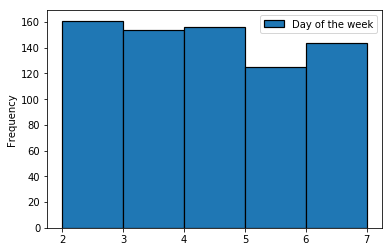

In [5]:
dataset.plot(kind = 'hist',y= "Day of the week",bins=range(2,8),edgecolor='black', linewidth=1.2)
plt.show()

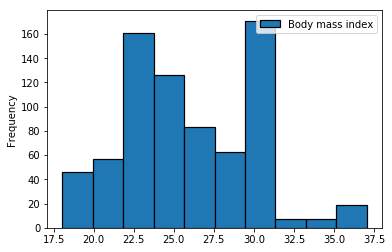

In [6]:
dataset.plot(kind = 'hist',y= "Body mass index",edgecolor='black', linewidth=1.2,align='left')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def TestTrain(x, y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print('Accuracy: {}'.format(round(knn.score(X_test, y_test), 3)))
    
    


In [29]:
#IMPORTANT ONE 
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestRegressor
def TestTrainRF(x, y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    nn = MLPClassifier(max_iter=1000)
    nn.fit(X_train, y_train)
    print('Accuracy: {}'.format(round(nn.score(X_test, y_test), 3)))

In [30]:
#This cleans up the data, and gets rid of the null values
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_with_imputed_values = my_imputer.fit_transform(dataset)
print(data_with_imputed_values)

[[ 1. 22.  7. ... 29.  8. 23.]
 [ 1. 23.  8. ... 29.  4. 23.]
 [ 1. 26. 12. ... 29.  8. 23.]
 ...
 [36.  0.  5. ... 31.  0. 34.]
 [36. 19.  6. ... 31. 24. 34.]
 [36. 19.  6. ... 31.  3. 34.]]


C:\Users\Cameron\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
    y = dataset['Body mass index']
    x = dataset.drop('Body mass index', axis=1)
    TestTrainRF(x,y)

Accuracy: 0.986


In [32]:
    y = dataset['Absenteeism time in hours']
    x = dataset.drop('Absenteeism time in hours', axis=1)
    TestTrainRF(x,y)

Accuracy: 0.372


In [11]:
def estimateMissingEMP():
    
    ID = int(input("Enter Month"))
    if (ID > 12 or ID < 1):
        ID = input("Enter month between 1 and 12")
    Day = int(input("Enter Day of Week"))
    if (Day > 33 or Day < 1):
        ID = input("Enter day between 1 and 33")
    Seasons = int(input("Enter seasons"))
    return(ID,Day,Seasons)
    

In [12]:
def collectData():
    ID = input("Enter Employee ID ")
    Distance = input("Enter Employee Distance From work ")
    Service = input("Enter Employee Service Time ")
    AGE = input("Employee Age")
    EDU = input("Enter Employee Education")
    Child = input("Enter Number of children")
    Pets = input("Enter Number of pets")
    BMI = input("Enter BMI")
    return(ID,Distance,Service,AGE,EDU,Child,Pets,BMI)
    

In [13]:
def KNNPredict(x, y,df):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)    
    return knn.predict(df2)

In [46]:
    collection = collectData()
    
    df2 = pd.DataFrame({"ID":[collection[0]],
                    "Age":[collection[3]],
                    "Distance from Residence to Work":[collection[1]],
                    "Service time":[collection[2]],
                    "Education":[collection[4]],
                        "Son":[collection[5]],
                        "pet":[collection[6]],
                        "Body mass index":[collection[7]]

                              
                              }) 
    
    y = dataset['Total']

    
    x = dataset.drop(['Total','Reason for absence','Day of the week','Seasons','Transportation expense','Hit target',
                     'Work load Average/day ','Social drinker','Social smoker','Weight','Height','Absenteeism time in hours','Month of absence',
                      'Disciplinary failure'
                     
                     ], axis=1)



    print("DAYS EXPECTED TO BE ABSENT:" ,KNNPredict(x,y, df2))

Enter Employee ID 38
Enter Employee Distance From work 54
Enter Employee Service Time 0
Employee Age34
Enter Employee Education1
Enter Number of children2
Enter Number of pets4
Enter BMI21
DAYS EXPECTED TO BE ABSENT: [76]


In [30]:
collection = estimateMissingEMP()
df2 = pd.DataFrame({"ID":[collection[0]],"Day of the week":[collection[1]],"Seasons":[collection[2]]
                              }) 
    
y = dataset['Absenteeism time in hours']

    
x = dataset.drop(['Total','Reason for absence','Day of the week','Month of absence','Transportation expense','Distance from Residence to Work','Hit target',
                     'Service time','Age','Work load Average/day ','Social drinker','Social smoker','Weight','Height','Absenteeism time in hours','Month of absence',
                      'Disciplinary failure','Education','Son','ID'
                     
                     ], axis=1)

prediction = KNNPredict(x,y, df2)
int(prediction)
print("EMPLOYEES EXPECTED TO BE ABSENT:" ,prediction)

Enter Month12
Enter Day of Week5
Enter seasons4
EMPLOYEES EXPECTED TO BE ABSENT: [1]


In [28]:
y = dataset['Total']

    
x = dataset.drop(['Total','Reason for absence','Day of the week','Seasons','Transportation expense','Hit target',
                     'Work load Average/day ','Social drinker','Social smoker','Weight','Height','Absenteeism time in hours','Month of absence',
                      'Disciplinary failure'
                     
                     ], axis=1)

from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf',gamma='scale')
svr_regressor.fit(X,y.ravel())



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

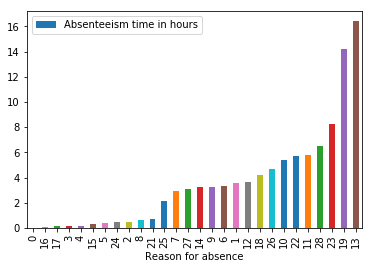

In [35]:
def graphrvsA(X,Y):
    graph = mldataset.groupby(X)[Y].sum()
    graph = graph.reset_index()
    graph[Y] = graph[Y] * 100 / sum(mldataset[Y]) #clean up the data
    graph = graph.sort_values(by=['Absenteeism time in hours'])
    return graph.plot.bar(X,Y)

graphrvsA('Reason for absence','Absenteeism time in hours')

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor(n_estimators=70)
X = dataset.drop(columns=('Absenteeism time in hours')) #everything but what we want to find.

y = dataset['Absenteeism time in hours']
regressor.fit(X, y)
imp_feat = pd.DataFrame({'Feature': dataset.drop(columns='Absenteeism time in hours').columns,
                         'importance':regressor.feature_importances_*100})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,Reason for absence,19.299702
1,Day of the week,14.441047
2,Month of absence,11.331393
3,Work load Average/day,10.137480
4,Hit target,7.264184
5,Seasons,6.651246
6,Age,5.424737
7,Height,3.026080
8,Disciplinary failure,2.882569
9,Total,2.848030


In [37]:
from sklearn.neural_network import MLPRegressor